In [66]:
import librosa
import pandas as pd
import numpy as np
import scipy.io.wavfile as wav
import os
import csv
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras import initializers
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, average_precision_score

In [43]:
n_mfcc = 10
num_kmeans = 5

folder = "Ambulance data" # change relative path here to look for original Ambulance data .wav
features=[] 
labels=[] 
files = os.listdir(f'../{folder}')
for filename in files:
    path = os.path.join('../', folder, filename)
    y, sr = librosa.load(path)
    data = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    features.append(data)
    labels.append(1)
    
# features = np.vstack(features)
Amb_df = pd.DataFrame({'file_name': files, 'features': features, 'labels': labels})
Amb_df

,file_name,features,labels
0,ambulance864.wav,"[[-219.48415, -196.20642, -198.86726, -203.495...",1
1,ambulance870.wav,"[[-83.18829, -77.74606, -84.38651, -91.4631, -...",1
2,ambulance858.wav,"[[-73.516685, -30.55424, -26.619394, -29.97802...",1
3,ambulance680.wav,"[[-236.11478, -160.4977, -148.80777, -159.0704...",1
4,ambulance694.wav,"[[-222.50467, -153.08594, -139.94177, -141.414...",1
...,...,...,...
927,ambulance666.wav,"[[-235.98105, -172.26976, -161.74927, -150.718...",1
928,ambulance855.wav,"[[-415.58374, -376.13367, -371.98495, -381.375...",1
929,ambulance699.wav,"[[-158.60631, -90.503716, -79.48663, -82.77847...",1
930,ambulance841.wav,"[[-162.4736, -131.72069, -138.96619, -142.9946...",1


In [44]:
folder = "Road Noises" # change relative path here to look for original Road data .wav
features=[] 
labels=[] 
files = os.listdir(f'../{folder}')
for filename in files:
    path = os.path.join('../', folder, filename)
    y, sr = librosa.load(path, duration=7)
    data = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    features.append(data)
    labels.append(0)
    
# features = np.vstack(features)
RN_df = pd.DataFrame({'file_name': files, 'features': features, 'labels': labels})
RN_df

,file_name,features,labels
0,road363.wav,"[[-117.625336, -75.7166, -72.183426, -76.36646...",0
1,road405.wav,"[[-118.16633, -101.86252, -96.64369, -96.79473...",0
2,road411.wav,"[[-447.87485, -468.4338, -487.31003, -481.5806...",0
3,road377.wav,"[[-204.51591, -176.08685, -177.90091, -180.402...",0
4,road439.wav,"[[-417.07068, -404.1843, -400.41617, -400.9253...",0
...,...,...,...
897,road352.wav,"[[-219.25154, -180.95609, -173.18414, -178.065...",0
898,road434.wav,"[[-411.4701, -382.49396, -386.93787, -387.9539...",0
899,road420.wav,"[[-411.7272, -443.92148, -471.21045, -459.9034...",0
900,road346.wav,"[[-173.90123, -141.68814, -142.28345, -137.957...",0


In [45]:
# combine two df
total_df = pd.concat([Amb_df, RN_df], ignore_index=True)
total_df

,file_name,features,labels
0,ambulance864.wav,"[[-219.48415, -196.20642, -198.86726, -203.495...",1
1,ambulance870.wav,"[[-83.18829, -77.74606, -84.38651, -91.4631, -...",1
2,ambulance858.wav,"[[-73.516685, -30.55424, -26.619394, -29.97802...",1
3,ambulance680.wav,"[[-236.11478, -160.4977, -148.80777, -159.0704...",1
4,ambulance694.wav,"[[-222.50467, -153.08594, -139.94177, -141.414...",1
...,...,...,...
1829,road352.wav,"[[-219.25154, -180.95609, -173.18414, -178.065...",0
1830,road434.wav,"[[-411.4701, -382.49396, -386.93787, -387.9539...",0
1831,road420.wav,"[[-411.7272, -443.92148, -471.21045, -459.9034...",0
1832,road346.wav,"[[-173.90123, -141.68814, -142.28345, -137.957...",0


In [46]:
# import data shuffled by Jerry
train_df = pd.read_csv('../Data/processed_data/train.csv') #change path here for shuffled data
train_file_name = train_df['filename']
train_df = total_df[total_df['file_name'].isin(train_file_name)].set_index('file_name').loc[train_file_name].reset_index()


test_df = pd.read_csv('../Data/processed_data/test.csv') #change path here for shuffled data
test_file_name = test_df['filename']
test_df = total_df[total_df['file_name'].isin(test_file_name)].set_index('file_name').loc[test_file_name].reset_index()

val_df = pd.read_csv('../Data/processed_data/validation.csv') #change path here for shuffled data
val_file_name = val_df['filename']
val_df = total_df[total_df['file_name'].isin(val_file_name)].set_index('file_name').loc[val_file_name].reset_index()

In [47]:
# set up a numpy array for KNN encoding
pre_knn = np.concatenate(train_df['features'].to_list(), axis=1)
from sklearn.cluster import KMeans
kmeans_models = []
#set up KNN classifiers
for i in range(len(pre_knn)):
    kmeans = KMeans(n_clusters=num_kmeans, random_state=0, n_init="auto").fit(pre_knn[i].reshape(-1, 1))
    kmeans_models.append(kmeans)

In [48]:
def get_kmeans_array(feature, models=kmeans_models, num_kmeans = num_kmeans):
    kmeans_array = []
    for i, model in enumerate(kmeans_models):
        prediction = model.predict(feature[i].reshape(-1, 1))
        counter = []
        for i in range(num_kmeans):
            counter.append((prediction==i).sum())
        kmeans_array.append(counter)
    return np.array(kmeans_array)

In [49]:
example = train_df.features[0]
get_kmeans_array(example)

array([[122,   0,   1,   7,   0],
       [  0, 119,   0,   2,   9],
       [  0,  25,   0,   0, 105],
       [ 20,  41,  69,   0,   0],
       [  0,  19,  72,   5,  34],
       [ 20,   8,  40,   0,  62],
       [ 29,  28,   3,  33,  37],
       [ 12,  54,  33,   5,  26],
       [ 30,  20,  45,   9,  26],
       [ 33,  25,  29,  42,   1]])

In [50]:
train_df['kmeans_array'] = train_df.features.apply(lambda x: get_kmeans_array(x))
test_df['kmeans_array'] = test_df.features.apply(lambda x: get_kmeans_array(x))
val_df['kmeans_array'] = val_df.features.apply(lambda x: get_kmeans_array(x))

In [51]:
X_train = train_df['kmeans_array']
y_train = train_df['labels']
X_test = test_df['kmeans_array']
y_test = test_df['labels']
X_val = val_df['kmeans_array']
y_val = val_df['labels']

In [52]:
mfcc_max = np.array(X_train.to_list()).max(axis=0).max(axis=1)
mfcc_min = np.array(X_train.to_list()).min(axis=0).min(axis=1)
X_train_std = X_train.apply(lambda x: (x - mfcc_min[:,None]) / (mfcc_max[:,None] - mfcc_min[:,None]))
X_test_std = X_test.apply(lambda x: (x - mfcc_min[:,None]) / (mfcc_max[:,None] - mfcc_min[:,None]))
X_val_std = X_val.apply(lambda x: (x - mfcc_min[:,None]) / (mfcc_max[:,None] - mfcc_min[:,None]))

In [108]:
def build_model(input_shape=(n_mfcc,num_kmeans), n_classes=1):
    """Return a simple logistic regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(1)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(10,input_shape=input_shape,return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(10))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(
        units=n_classes,
        use_bias=True,
        activation='sigmoid',
        name='Output'
        ))
    model.summary()
    

    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate = 0.02),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

    return model

In [109]:
# build model
model = build_model()

# train model
num_epochs = 15
batch_size=50

history = model.fit(
                x=np.array(X_train_std.to_list()),
                y=y_train,
                epochs=num_epochs,
                batch_size=batch_size,
                validation_data = (np.array(X_val_std.to_list()), y_val),
                verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            640       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 Output (Dense)              (None, 1)                 6

2023-08-03 23:29:01.886426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:29:02.134353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:29:02.301743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:29:02.811738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:29:03.113949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - ETA: 0s - loss: 0.6906 - binary_accuracy: 0.5051

2023-08-03 23:29:05.680387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:29:05.773125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:29:05.920631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 6s 126ms/step - loss: 0.6906 - binary_accuracy: 0.5051 - val_loss: 0.6487 - val_binary_accuracy: 0.5782
Epoch 2/15
26/26 [==============================] - 1s 34ms/step - loss: 0.5504 - binary_accuracy: 0.7249 - val_loss: 0.4549 - val_binary_accuracy: 0.8109
Epoch 3/15
26/26 [==============================] - 1s 25ms/step - loss: 0.3707 - binary_accuracy: 0.8667 - val_loss: 0.2952 - val_binary_accuracy: 0.8836
Epoch 4/15
26/26 [==============================] - 1s 21ms/step - loss: 0.2778 - binary_accuracy: 0.9002 - val_loss: 0.3193 - val_binary_accuracy: 0.8873
Epoch 5/15
26/26 [==============================] - 1s 19ms/step - loss: 0.2344 - binary_accuracy: 0.9182 - val_loss: 0.2693 - val_binary_accuracy: 0.9091
Epoch 6/15
26/26 [==============================] - 1s 22ms/step - loss: 0.2070 - binary_accuracy: 0.9314 - val_loss: 0.2320 - val_binary_accuracy: 0.9236
Epoch 7/15
26/26 [==============================] - 0s 17ms/step - loss: 0.2098 

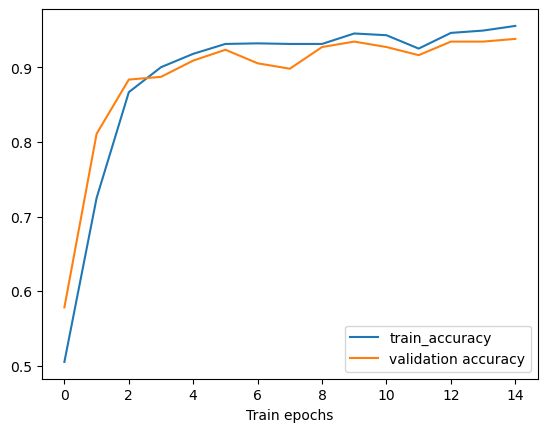

9/9 [==============================] - 0s 41ms/step - loss: 0.1209 - binary_accuracy: 0.9565


In [110]:
train_accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
plt.plot(train_accuracy, label='train_accuracy')
plt.plot(val_accuracy, label='validation accuracy')
plt.xlabel('Train epochs')
plt.legend()
plt.show()

test_accuracy = model.evaluate(x=np.array(X_test_std.to_list()), y=y_test, verbose=1,
                             return_dict=True)['binary_accuracy']

2023-08-03 23:29:21.613965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:29:21.697433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/41 [..............................] - ETA: 22s

2023-08-03 23:29:21.842082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 12ms/step
Training, misclassified examples: 51
Training, prediction accuracy: 0.960
------------
Training, misclassified examples: 17
Training, prediction accuracy: 0.938
------------
Test, misclassified examples: 12
Test, prediction accuracy: 0.957


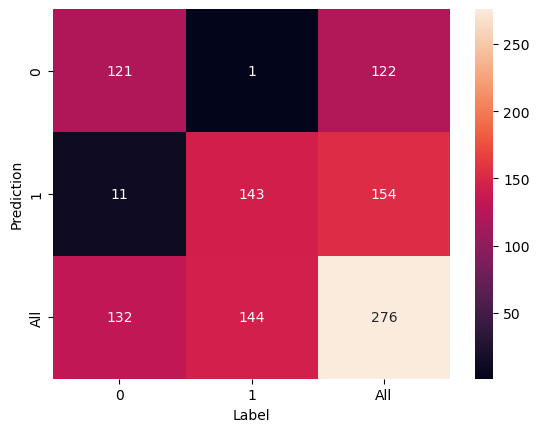

In [111]:
y_train_pred = model.predict(x=np.array(X_train_std.to_list())).flatten()

# apply the threshold function to create a 0, 1 outcome
y_train_pred = np.where(y_train_pred>=0.5, 1, 0)


y_validation_pred = model.predict(x=np.array(X_val_std.to_list())).flatten()
y_validation_pred = np.where(y_validation_pred>=0.5, 1, 0)


# run the trained model on the test data (the model outputs probabilities)
y_pred_prob = model.predict(x=np.array(X_test_std.to_list())).flatten()
# apply the threshold function to create a 0, 1 outcome
y_pred = np.where(y_pred_prob>=0.5, 1, 0)


# print accuracy for train
print('Training, misclassified examples: %d' % (y_train != y_train_pred).sum())
error_train_tf = (y_train != y_train_pred).sum()/len(y_train_pred)
print('Training, prediction accuracy: %.3f'% (1-error_train_tf))

print('------------')
print('Training, misclassified examples: %d' % (y_val != y_validation_pred).sum())
error_train_tf = (y_val != y_validation_pred).sum()/len(y_validation_pred)
print('Training, prediction accuracy: %.3f'% (1-error_train_tf))

print('------------')

# print accuracy for test

print('Test, misclassified examples: %d' % (y_test != y_pred).sum())
error_test_tf = (y_test != y_pred).sum()/len(y_pred)
print('Test, prediction accuracy: %.3f'% (1-error_test_tf))

confusion_matrix = pd.crosstab(y_pred,y_test, rownames=['Prediction'], colnames=['Label'],margins = True)
sns.heatmap(confusion_matrix, annot=True,fmt='g')
pass

In [112]:
# Looking at precision, recall and F1 scores
print('Precision score: %.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall score: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('F1 score %.3f' % f1_score(y_test, y_pred, average='macro'))

Precision score: 0.960
Recall score: 0.955
F1 score 0.956


In [113]:
# Looking at the classification report
print('\n Classification report for k=5:\n', classification_report(y_test, y_pred))


 Classification report for k=5:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       132
           1       0.93      0.99      0.96       144

    accuracy                           0.96       276
   macro avg       0.96      0.95      0.96       276
weighted avg       0.96      0.96      0.96       276



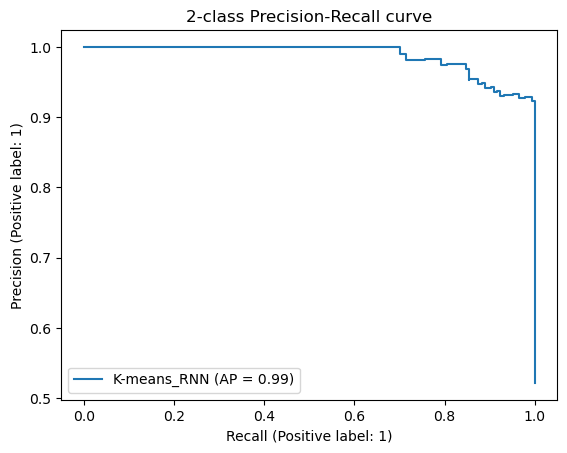

In [115]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred_prob, name="K-means_RNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
pd.DataFrame(y_pred_prob).to_csv('../Data/model_predictions/KmeanRNN_model.csv')